Analyses and figure results I did in this work

# Preparing
import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pylab

# 1. TE analysis in reference genome
import the statistic result of TEs

In [3]:
summ = pd.read_table('data/chr1A/stats.nl.old.txt', sep='\s+', header=0, index_col=0)
summ.index.name = 'Classification'
summ['size (Mb)'] = summ['size'] / 1000000
summ.index = summ.index.fillna('NULL')

## 1.1 TE content (size)
doing colum chart

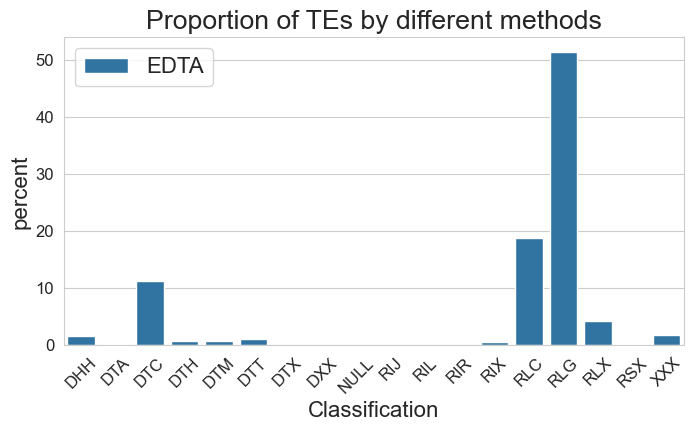

In [4]:
plt.style.use('fast') 

mpl.rcParams['font.size'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.figure(figsize=(8, 4))

sns.barplot(data=summ, x='Classification', y='percent', label='EDTA')
plt.xticks(rotation=45)
plt.title('Proportion of TEs by different methods')
plt.legend()
plt.show()

doing pie chart

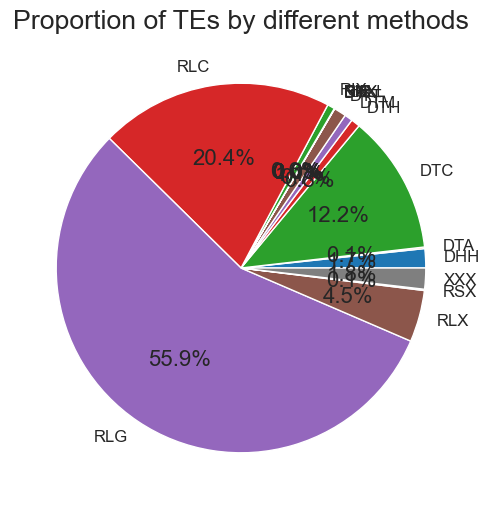

In [5]:
plt.style.use('fast')

mpl.rcParams['font.size'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(6, 6))
plt.pie(summ['size'], labels=summ.index, autopct='%1.1f%%')
plt.title('Proportion of TEs by different methods')

plt.show()

accumulative proportion of TE fraction by families

## 1.2 TE content (copy number)
complete TE copy number in different families

distance of TEs to the closest gene

## 1.3 TE distribution along the chromosome
also label the centrometric/pericentromeric and recombinogenic distal regions

### 1.3.1 TE distribution correlation of EDTA and CS

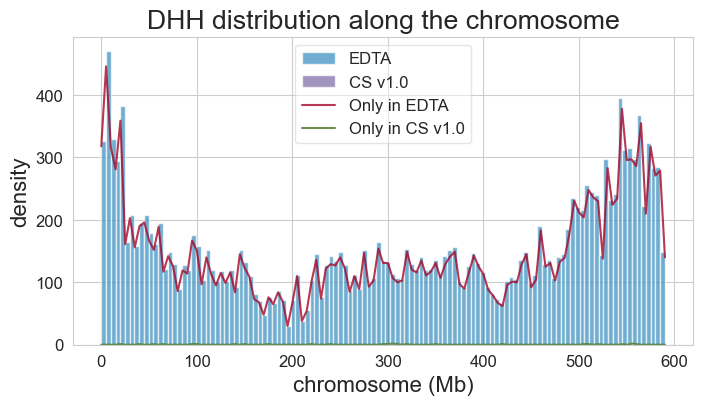

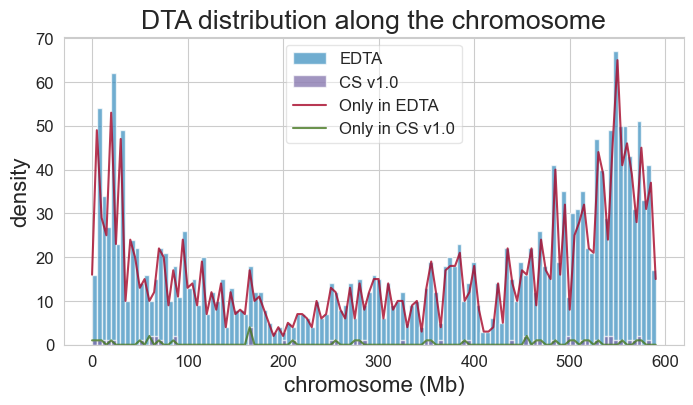

In [6]:
import WeaTE.ref.toPlot as toPlot

file_name = ["DHH", "DTA", "DTC", "DTH", "DTM", "DTT", "DTX", "DXX", "NULL", "RIJ", "RIL", "RIR", "RIX", "RLC", "RLG", "RLX", "RSX", "XXX"]
plt.style.use('seaborn-v0_8-deep')
mpl.rcParams['font.size'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
for name in file_name:
    fig, ax = plt.subplots()
    ax.figure.set_size_inches(8, 4)
    toPlot.compare_te(ax, name, 'EDTA', 'EDTA', '#348ABD', 'hist')
    toPlot.compare_te(ax, name, 'CS v1.0', 'CS', '#7A68A6', 'hist')
    toPlot.difference_te(ax, name, 'Only in EDTA', 'vEDTA', '#A60628', 'plot')
    toPlot.difference_te(ax, name, 'Only in CS v1.0', 'vCS', '#467821', 'plot')
    ax.set_xlabel('chromosome (Mb)')
    ax.set_ylabel('density')
    ax.set_title(name + " distribution along the chromosome")
    ax.legend(fontsize=12, framealpha=0.5)
    plt.show()
    if name == 'DTA':
        break

### 1.3.1 benchmark of EDTA to CS annotation
get embed threshold

/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/3471503567.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(f'{26905}', fontsize=12, color='darkred', xy=(0.8, 26905/sum_num), xytext=(0.68, 29005/sum_num), textcoords='data', xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05, color='darkred'))
/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/3471503567.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(f'{25841}', fontsize=12, color='darkred', xy=(0.8, 25841/sum_num), xytext=(0.84, 23041/sum_num), textcoords='data', xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05, color='darkred'))


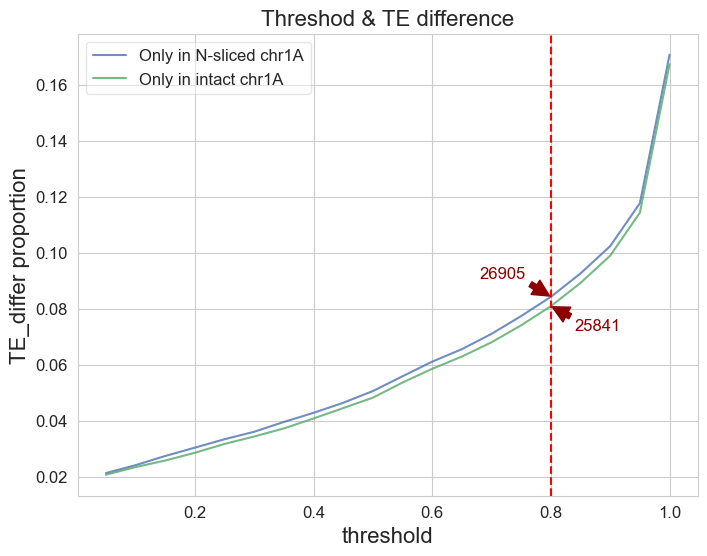

In [7]:
plt.style.use('seaborn-v0_8-deep')

fthrsd = np.arange(1, 0, -0.05)
nav = [54542, 37598, 32698, 29581, 26905, 24715, 22680, 20930, 19507, 17839,
       16150, 14810, 13661, 12625, 11502, 10648, 9688, 8736, 7687, 6784]
anv = [53448, 36507, 31609, 28498, 25841, 23659, 21718, 20087, 18687, 17124,
       15396, 14204, 13021, 11880, 10962, 10113, 9102, 8219, 7466, 6596]

sum_num = (320051+318956)/2

nav = [i/sum_num for i in nav]
anv = [i/sum_num for i in anv]

fig, ax = plt.subplots()
ax.figure.set_size_inches(8, 6)
ax.plot(fthrsd, nav, label='Only in N-sliced chr1A', alpha=0.8)
ax.plot(fthrsd, anv, label='Only in intact chr1A', alpha=0.8)
ax.axvline(x=0.8, color='r', linestyle='--')

ax.annotate(f'{26905}', fontsize=12, color='darkred', xy=(0.8, 26905/sum_num), xytext=(0.68, 29005/sum_num), textcoords='data', xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05, color='darkred'))
ax.annotate(f'{25841}', fontsize=12, color='darkred', xy=(0.8, 25841/sum_num), xytext=(0.84, 23041/sum_num), textcoords='data', xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05, color='darkred'))

ax.set_xlabel('threshold', fontsize=16)
ax.set_ylabel('TE_differ proportion', fontsize=16)
ax.set_title('Threshod & TE difference', fontsize=16)
ax.legend(fontsize=12, framealpha=0.5)
plt.show()

detect overlap

0    0.065781
1    0.071647
2    0.163206
Name: same type, dtype: float64


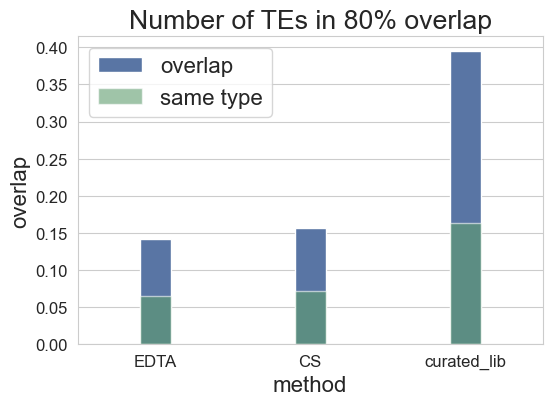

In [8]:
# overlap in mean 80%
total_TE = 150013

df = {'method': ['EDTA', 'CS', 'curated_lib'],
           'overlap': [21364, 23524, 59240],
           'same type': [9868, 10748, 24483]}
overlap = pd.DataFrame(df)
overlap['overlap'] = overlap['overlap'] / total_TE
overlap['same type'] = overlap['same type'] / total_TE

print(overlap['same type'])

# plot
plt.figure(figsize=(6, 4))
sns.barplot(data=overlap, x='method', y='overlap', label='overlap', width=0.2)
sns.barplot(data=overlap, x='method', y='same type', label='same type', width=0.2, alpha=0.6)
plt.title('Number of TEs in 80% overlap')
plt.legend()
plt.show()

## 1.4 TE library
length distribution of TEs in the library

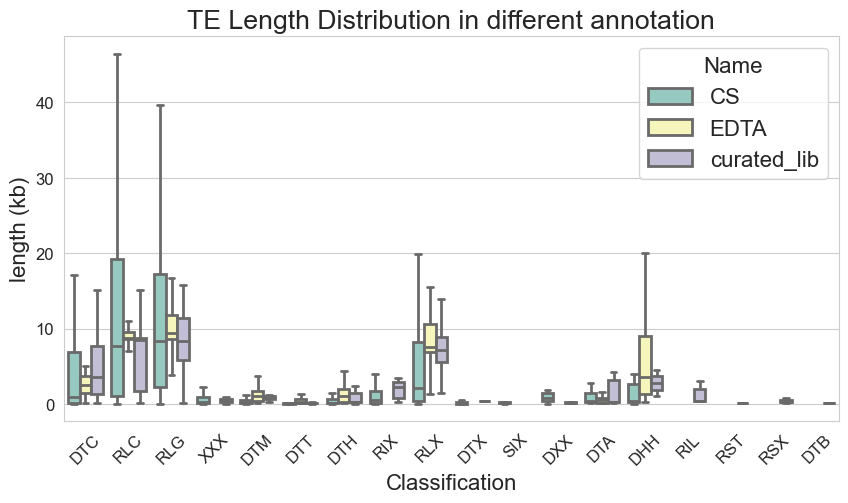

In [9]:
import WeaTE.ref.toPlot as toPlot

fig, ax = plt.subplots()
plt.rcParams['font.size'] = 16
ax.figure.set_size_inches(10, 5)

# Concatenate the dataframes
length = pd.concat([toPlot.plot_length('CS'), toPlot.plot_length('EDTA'), toPlot.plot_length('curated_lib')])
grouped = length.groupby(['Classification', 'triticeae']).mean()
length.reset_index(drop=True, inplace=True)

sns.boxplot(x='Classification', y='length (kb)', hue='triticeae', data=length, showfliers=False,
            palette='Set3', linewidth=2, dodge=True, ax=ax, width=0.8)
plt.xticks(rotation=45)
plt.title('TE Length Distribution in different annotation')
plt.legend(title='Name')  # 添加图例
plt.tick_params(axis='both', labelsize=12)
plt.show()

# 2. TE analysis in population
test mapping rate in CS TE library

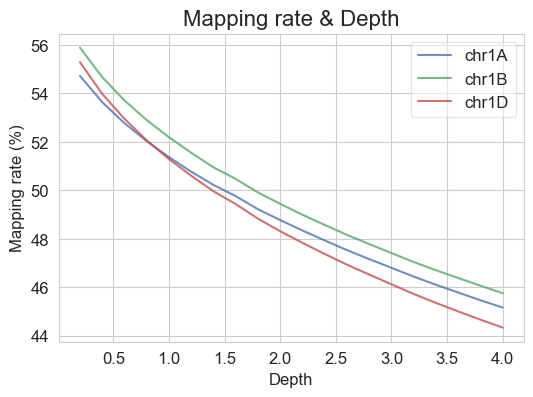

In [10]:
map_rate = {
    'num': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0],
    '1A': [54.72, 53.64, 52.77, 52.03, 51.37, 50.77, 50.22, 49.76,
           49.22, 48.77, 48.34, 47.93, 47.53, 47.16, 46.80,
           46.44, 46.10, 45.78, 45.46, 45.16],
    '1B': [55.89, 54.67, 53.71, 52.90, 52.19, 51.55, 50.95, 50.47,
           49.91, 49.44, 48.99, 48.57, 48.16, 47.78, 47.41,
           47.04, 46.70, 46.38, 46.06, 45.75],
    '1D': [55.29, 53.98, 52.95, 52.06, 51.29, 50.60, 49.96, 49.43,
           48.83, 48.31, 47.83, 47.37, 46.93, 46.52, 46.12,
           45.72, 45.35, 45.00, 44.66, 44.33]
}

fig, ax = plt.subplots()
ax.figure.set_size_inches(6, 4)
ax.plot(map_rate['num'], map_rate['1A'], label='chr1A', alpha=0.8)
ax.plot(map_rate['num'], map_rate['1B'], label='chr1B', alpha=0.8)
ax.plot(map_rate['num'], map_rate['1D'], label='chr1D', alpha=0.8)
ax.set_xlabel('Depth', fontsize=12)
ax.set_ylabel('Mapping rate (%)', fontsize=12)
ax.set_title('Mapping rate & Depth', fontsize=16)
ax.legend(fontsize=12, framealpha=0.5)
plt.show()

mapping rate of different methods

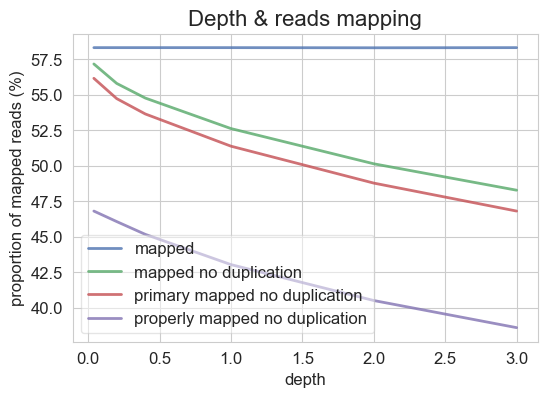

In [11]:
plt.style.use('seaborn-v0_8-deep')

fthrsd = [0.04, 0.2, 0.4, 1, 2, 3]
mapped = [58.31, 58.31, 58.31, 58.31, 58.30, 58.31]
nodp_mapped = [57.16, 55.79, 54.76, 52.61, 50.13, 48.27]
nodp_primary = [56.15, 54.72, 53.64, 51.37, 48.77, 46.80]
nodp_properly = [46.80, 46.06, 45.16, 43.03, 40.50, 38.59]

fig, ax = plt.subplots()
ax.figure.set_size_inches(6, 4)
ax.plot(fthrsd, mapped, label='mapped', alpha=0.8, linewidth=2)
ax.plot(fthrsd, nodp_mapped, label='mapped no duplication', alpha=0.8, linewidth=2)
ax.plot(fthrsd, nodp_primary, label='primary mapped no duplication', alpha=0.8, linewidth=2)
ax.plot(fthrsd, nodp_properly, label='properly mapped no duplication', alpha=0.8, linewidth=2)

ax.set_xlabel('depth', fontsize=12)
ax.set_ylabel('proportion of mapped reads (%)', fontsize=12)
ax.set_title('Depth & reads mapping', fontsize=16)
ax.legend(fontsize=12, framealpha=0.5)
plt.show()

## TE age
gamma distribution

/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/2891534402.py:22: RuntimeWarning: divide by zero encountered in divide
  y1 = (1 / (x * sigma1 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu1)**2 / (2 * sigma1**2))
/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/2891534402.py:22: RuntimeWarning: divide by zero encountered in log
  y1 = (1 / (x * sigma1 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu1)**2 / (2 * sigma1**2))
/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/2891534402.py:22: RuntimeWarning: invalid value encountered in multiply
  y1 = (1 / (x * sigma1 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu1)**2 / (2 * sigma1**2))
/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/2891534402.py:23: RuntimeWarning: divide by zero encountered in divide
  y2 = (1 / (x * sigma2 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu2)**2 / (2 * sigma2**2))
/var/folders/jd/4fmdj1jn43b06wk1k_ck1wh80000gr/T/ipykernel_60009/28915

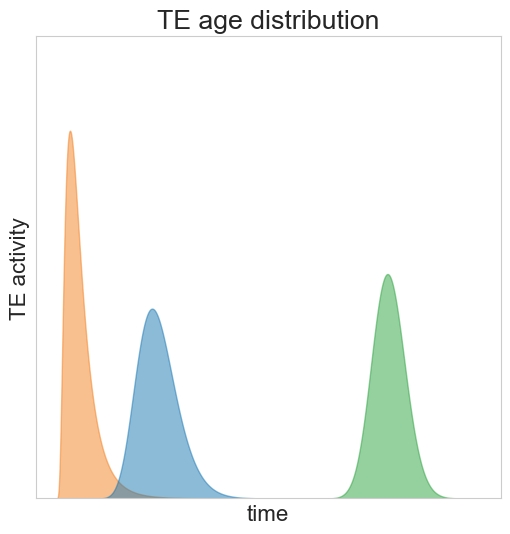

In [12]:
x_min = 0
x_max = 20
step_size = 0.01

# Generate x values
x = np.arange(x_min, x_max, step_size)

sigma1 = 0.6
sigma2 = 0.2
sigma3 = 0.05


mu1 = 0
mu2 = 1.6
mu3 = 2.8 # Shift the third distribution further to the right

# Recalculate the distributions with the new parameters

# y1 = (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
# y2 = (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
# y3 = (1 / (sigma3 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu3)**2 / (2 * sigma3**2))
y1 = (1 / (x * sigma1 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu1)**2 / (2 * sigma1**2))
y2 = (1 / (x * sigma2 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu2)**2 / (2 * sigma2**2))
y3 = (1 / (x * sigma3 * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu3)**2 / (2 * sigma3**2))

# Plot with filled areas and transparency

plt.figure(figsize=(6, 6))
plt.fill_between(x, y1, color='#f38121', alpha=0.5)
plt.fill_between(x, y2, color='#1b78b3', alpha=0.5)
plt.fill_between(x, y3, color='#2da340', alpha=0.5)
# plt.fill_between(x, y4, color='purple', alpha=0.5)

# Set x-axis limits
plt.xlim(-1, 22)
plt.ylim(0, 1)
# Remove grid
plt.grid(False)

# Remove axis ticks and labels
plt.xticks([])
plt.yticks([])
# Add title and labels
plt.title('TE age distribution')
plt.xlabel('time')
plt.ylabel('TE activity')

# Show plot
# plt.legend().set_visible(False)
plt.show()
# plt.savefig('plot.pdf')

# 3. TE analysis in population
tepid in 4 blocks